# Ice
An online store, Ice, sells video games all over the world. Reviews from users and experts, genres, platforms, and historical data on all game sales are open sources. We are identifying patterns that determine what games succeed. By doing this, it will allow us to spot big winners and plan advertising campaigns. 


## Data description

—*Name*

—*Platform*

—*Year_of_Release*

—*Genre*

—*NA_sales* (North American sales in USD million)

—*EU_sales* (sales in Europe in USD million)

—*JP_sales* (sales in Japan in USD million)

—*Other_sales* (sales in other countries in USD million)

—*Critic_Score* (maximum of 100)

—*User_Score* (maximum of 10)

—*Rating* (ESRB)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import plotly.express as px

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
games.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [7]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [8]:
games.duplicated().sum()

0

## Summary on the intro
- We loaded the dataset and there are 16715 entries in the dataset. 
- The two datasets are floats and objects.
- The sales are categorized into three major regions and another region that consists of others. 
- By displaying the first five rows, we see that there are NaN values in the critic score, user score, and ratings.
- We have multiple missing values and zero duplicate rows. 

# Preparing the data

In [9]:
# Replace the column names (make them lowercase)
games.columns = map(str.lower, games.columns)
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
# Convert the required data types
# Convert year_of_release to int64
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce').astype('Int64')

# Convert user_score to float64 
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
display(games.dtypes)

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [11]:
# Dropped NaNs in year_of_release
games.dropna(subset=['year_of_release'], inplace=True)
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
# Handling missing values in the 'year_of_release' column
games['year_of_release'].fillna(-1, inplace=True)
games['year_of_release'] = games['year_of_release'].astype(int)

In [13]:
# Returning an array containing all unique values present in the 'user_score' column
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [14]:
# This displays the count of occurrences of the value 'tbd' in the 'user_score' column
tbd_count = games['user_score'].value_counts().get('tbd')
display(tbd_count) 

None

In [15]:
# Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.
# List of columns representing sales in different regions
sales_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

# Calculate the total sales for each game
games['total_sales'] = games[sales_columns].sum(axis=1)

display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


## Summary on preparing the data
- I made all column names lowercase.
- Datatypes were changed to better the dataframe flow. Name, platform, genre, and rating are all objects. Year of release is now an integer. Both scores and all sales are floats. 
- The number of NaNs in year_or_release is less than 2%. Rows were just dropped.
- The total sales for all regions is now in its own column.

# Analyze the data

In [16]:
# Look at how many games were released in different years. Is the data for every period significant?
# Replace 'year_of_release' with the actual column name if different
yearly_game_counts = games['year_of_release'].value_counts()

# Sort the counts by year
yearly_game_counts = yearly_game_counts.sort_index()

display(yearly_game_counts)

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

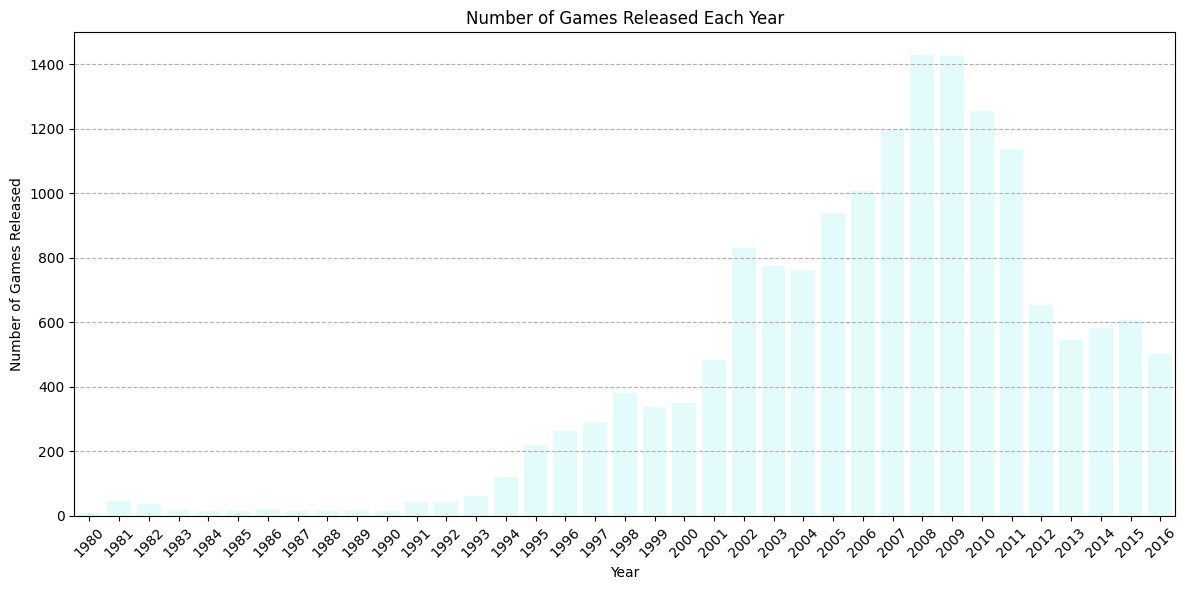

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_game_counts.index, y=yearly_game_counts.values, color='lightcyan')
plt.title('Number of Games Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

In [18]:
# Filtering games for entries from 2016 offering insights into trends in the gaming industry
games = games.loc[games['year_of_release'] >= 2014]
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [19]:
# Assess the significance of data for every period
display(yearly_game_counts.describe())

count      37.000000
mean      444.486486
std       451.557159
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: year_of_release, dtype: float64

- The data for yearly game counts is very significant year by year. We see that in 1980 there was only 9 games release, while in 1994 it jumped to the hundreds. 
- The year 2014 was chosen to filter games for developmental insights.

In [20]:
# Calculate total sales per platform
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print("Total sales by platform (top platforms):")
display(platform_sales.head(10))

Total sales by platform (top platforms):


platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

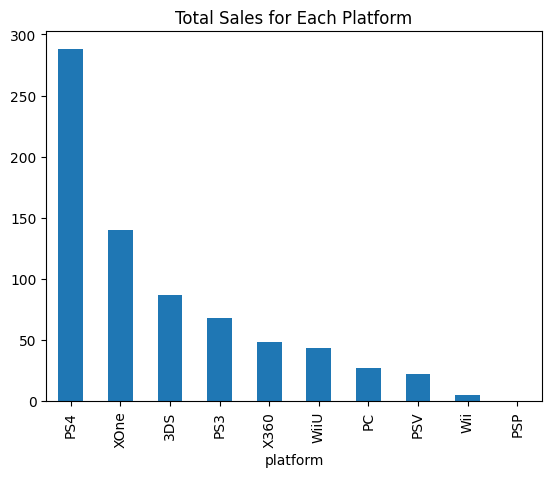

In [21]:
# Bar plot of total sales for each platform 
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar',title='Total Sales for Each Platform')
plt.show()

- I have listed the total sales by platform for the top 10 gaming devices.
- The total sales by platform are listed as well. The PS4 is leading with XOne and 3DS coming in second and third.
- A bar plot is also shown for visuals.

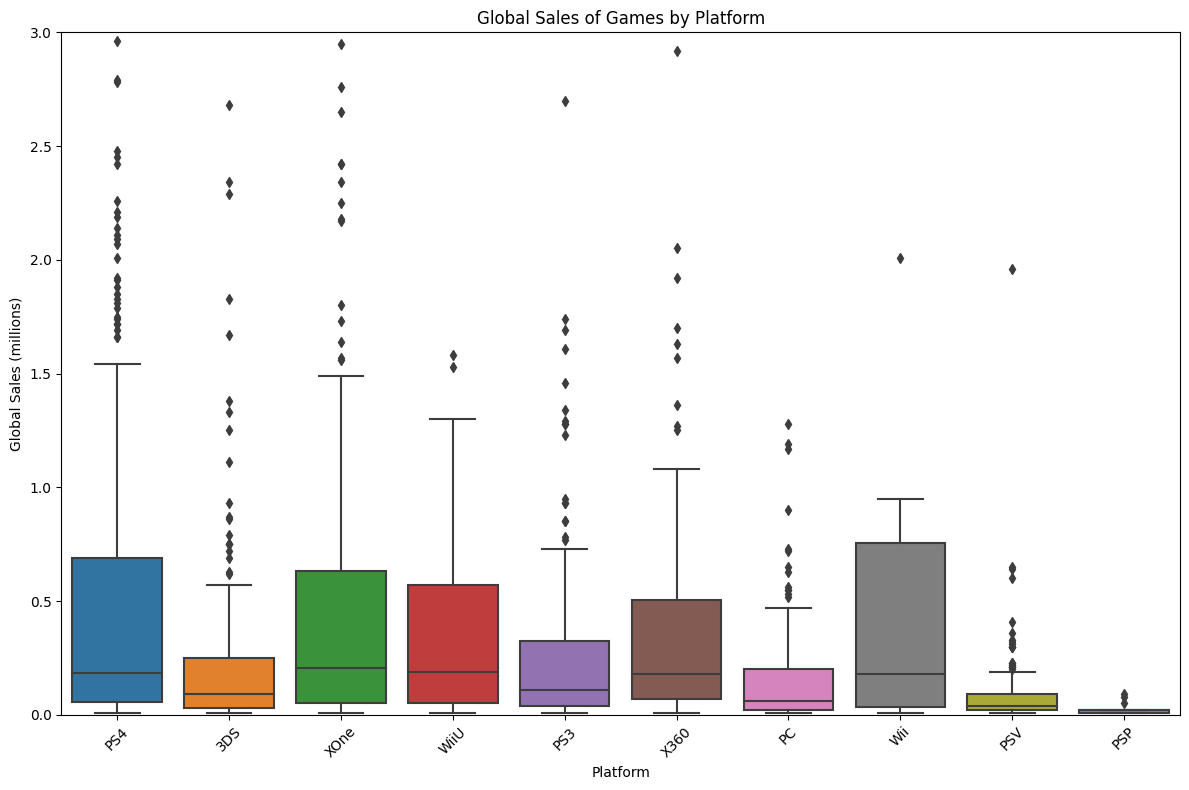

In [22]:
# Build a box plot for the global sales of all games
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=games)
plt.title('Global Sales of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=45)

plt.ylim(0, 3)

plt.tight_layout()
plt.show()

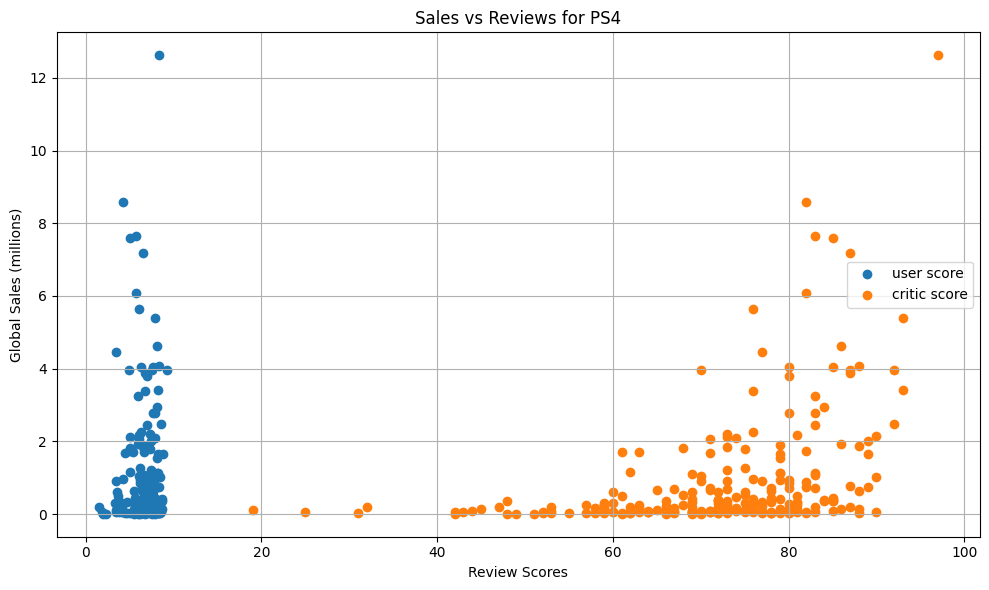

In [23]:
# Filter data for PS4 platform (I chose a PS4 because that's what my brother used to play)
platform = 'PS4'
df_ps4 = games[games['platform'] == platform]

# Drop rows with missing values in relevant columns
df_ps4 = df_ps4.dropna(subset=['user_score', 'critic_score', 'total_sales'])

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_ps4['user_score'], df_ps4['total_sales'], label='user score')
plt.scatter(df_ps4['critic_score'], df_ps4['total_sales'], label='critic score')
plt.title(f'Sales vs Reviews for {platform}')
plt.xlabel('Review Scores')
plt.ylabel('Global Sales (millions)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# Calculate correlation coefficients
correlation_user = df_ps4['user_score'].corr(df_ps4['total_sales'])
correlation_critic = df_ps4['critic_score'].corr(df_ps4['total_sales'])

print(f"Correlation between User Score and Global Sales: {correlation_user}")
print(f"Correlation between Critic Score and Global Sales: {correlation_critic}")

Correlation between User Score and Global Sales: -0.04318585997193634
Correlation between Critic Score and Global Sales: 0.40190287811475334


- A box plot of global sales of games by platform is included for visuals. 
- A scatter plot on sales verses reviews on a PS4 is shown. We are looking at user scores and critic scores. The distribution score isn't as spreaded out as much compared to critic score. 
- There is a negative correlation between user score and global sales.
- There is a positive correlation between critic score and global sales. 

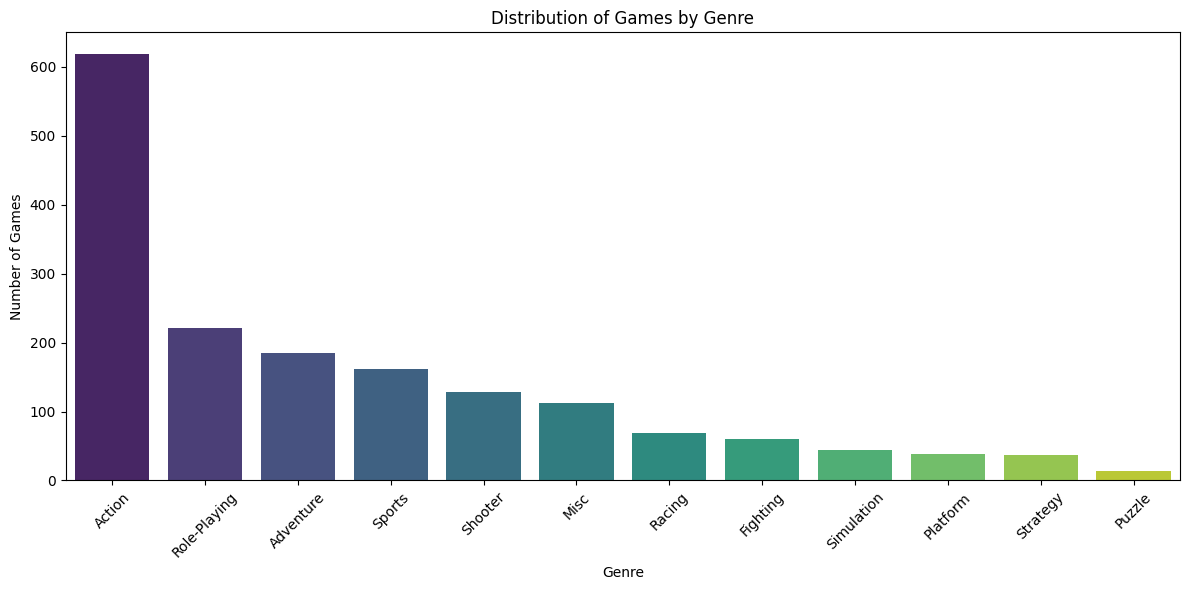

In [25]:
# Count the number of games in each genre
genre_counts = games['genre'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Distribution of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# Calculate total global sales by genre
genre_sales = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Calculate average global sales by genre
genre_avg_sales = games.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

# Print top genres by total sales and average sales
print("Genres by Total Sales:")
display(genre_sales)

print("\nGenres by Average Sales:")
display(genre_avg_sales)

Genres by Total Sales:


genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64


Genres by Average Sales:


genre
Shooter         1.335469
Sports          0.680000
Platform        0.476053
Fighting        0.470333
Role-Playing    0.459005
Racing          0.398841
Misc            0.332301
Action          0.322068
Simulation      0.298409
Puzzle          0.157857
Strategy        0.107027
Adventure       0.094865
Name: total_sales, dtype: float64

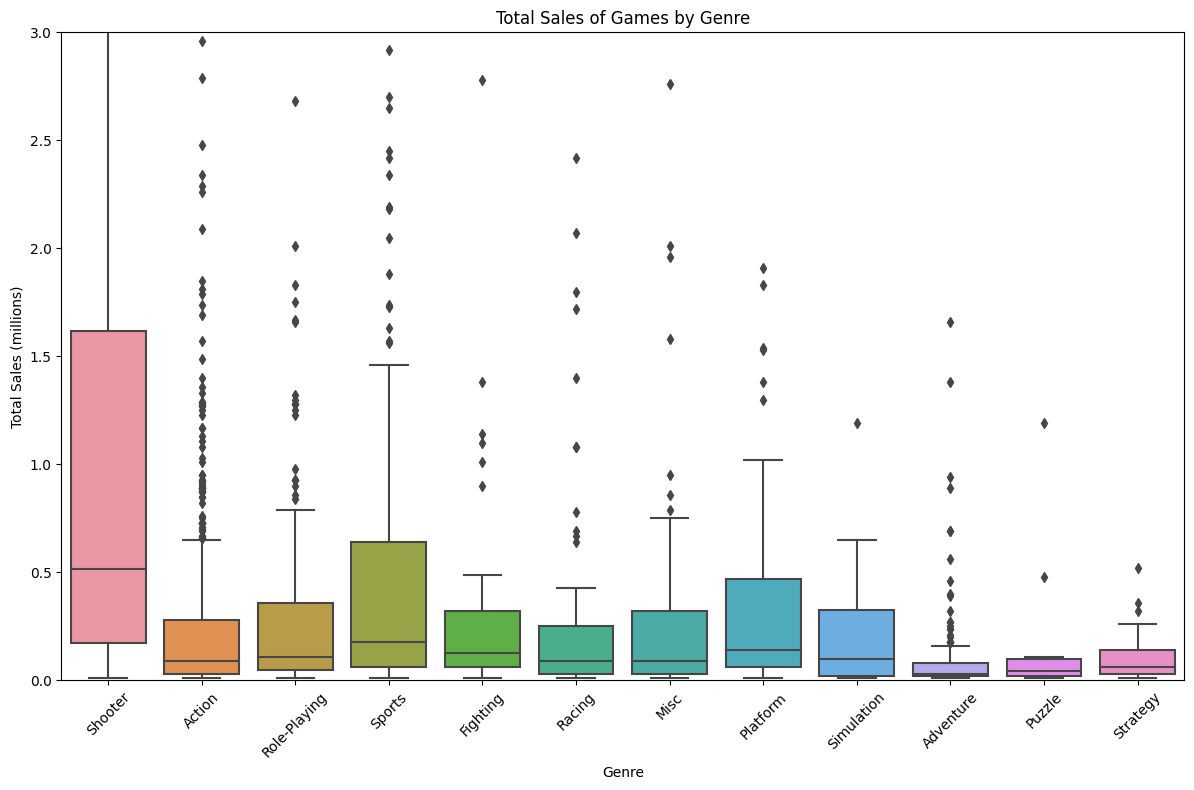

In [27]:
# Boxplot for genres by total_sales
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='total_sales', data=games)
plt.title('Total Sales of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 3)

plt.show()

I added a boxplot of total sales broken down by genres.

- There are over 175 games for the action genre with adventure and role playing coming in a close second and third. 
- In the genres by total sales, the top three are shooter, action, and sports games.
- In the genres by average sales, the leading genre is still shooting. Second is sports and third is role playing games. 

## NA sales data

In [28]:
# Group by platform and sum na_sales
platform_na_sales = games.groupby('platform')['na_sales'].sum()

# Sort 
top_5_platforms_na = platform_na_sales.sort_values(ascending=False).head(5)

print("Top 5 Platforms by NA Sales:")
display(top_5_platforms_na)

Top 5 Platforms by NA Sales:


platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

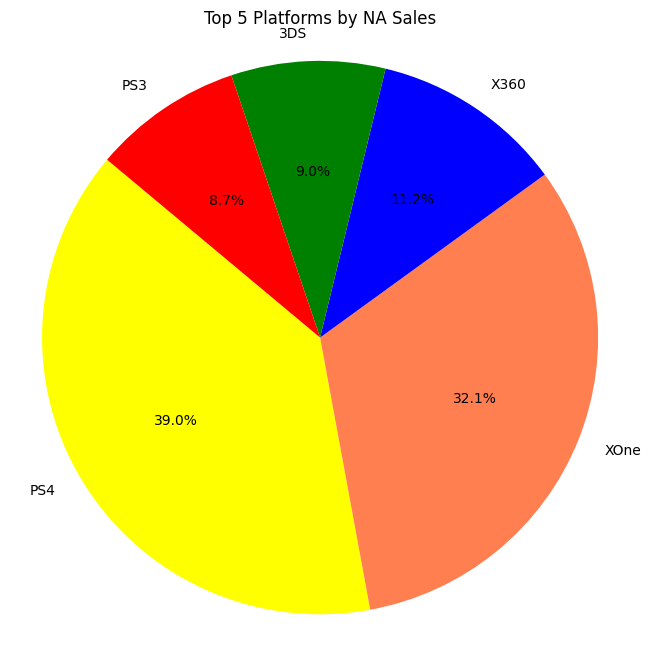

In [29]:
platforms = top_5_platforms_na.index
sales = top_5_platforms_na.values
colors = ['yellow', 'coral', 'blue', 'green', 'red']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales, labels=platforms, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Platforms by NA Sales')
plt.axis('equal')  
plt.show()

In [30]:
# Group by genre and sum na_sales
genre_na_sales = games.groupby('genre')['na_sales'].sum()

# Sort 
top_5_genres_na = genre_na_sales.sort_values(ascending=False).head(5)

print("Top 5 Genres by NA Sales:")
display(top_5_genres_na)

Top 5 Genres by NA Sales:


genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

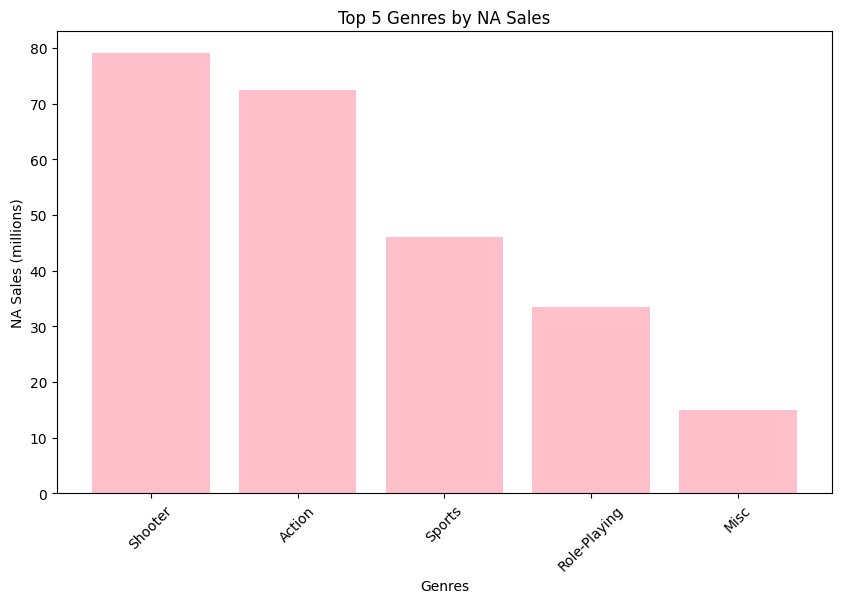

In [31]:
genres = top_5_genres_na.index
sales = top_5_genres_na.values

plt.figure(figsize=(10, 6))
plt.bar(genres, sales, color='pink')
plt.xlabel('Genres')
plt.ylabel('NA Sales (millions)')
plt.title('Top 5 Genres by NA Sales')
plt.xticks(rotation=45)

plt.show()

In [32]:
# Group by rating and sum na_sales
rating_na_sales = games.groupby('rating')['na_sales'].sum()

# Sort 
top_ratings_na = rating_na_sales.sort_values(ascending=False).head()

print("Top Ratings by NA Sales:")
display(top_ratings_na)

Top Ratings by NA Sales:


rating
M       96.42
E       50.74
T       38.95
E10+    33.23
Name: na_sales, dtype: float64

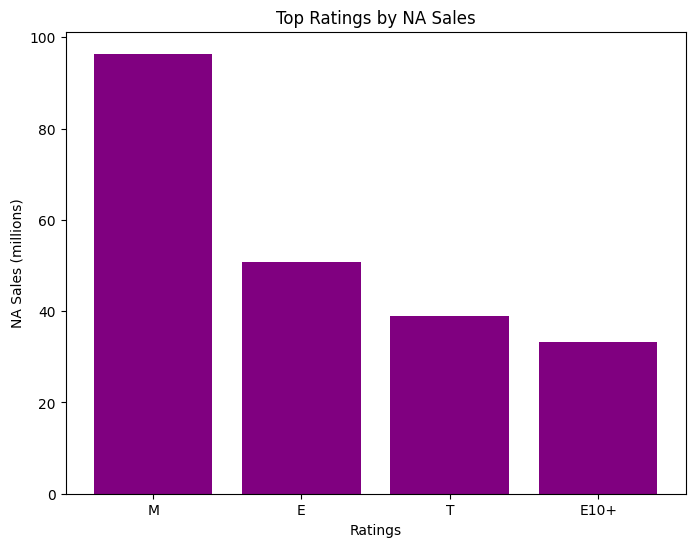

In [33]:
ratings = top_ratings_na.index
sales = top_ratings_na.values

plt.figure(figsize=(8, 6))
plt.bar(ratings, sales, color='purple')
plt.xlabel('Ratings')
plt.ylabel('NA Sales (millions)')
plt.title('Top Ratings by NA Sales')

plt.show()

## EU sales data

In [34]:
# Group by platform and sum eu_sales
platform_eu_sales = games.groupby('platform')['eu_sales'].sum()

# Sort 
top_5_platforms_eu = platform_eu_sales.sort_values(ascending=False).head(5)

print("Top 5 Platforms by EU Sales:")
display(top_5_platforms_eu)

Top 5 Platforms by EU Sales:


platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

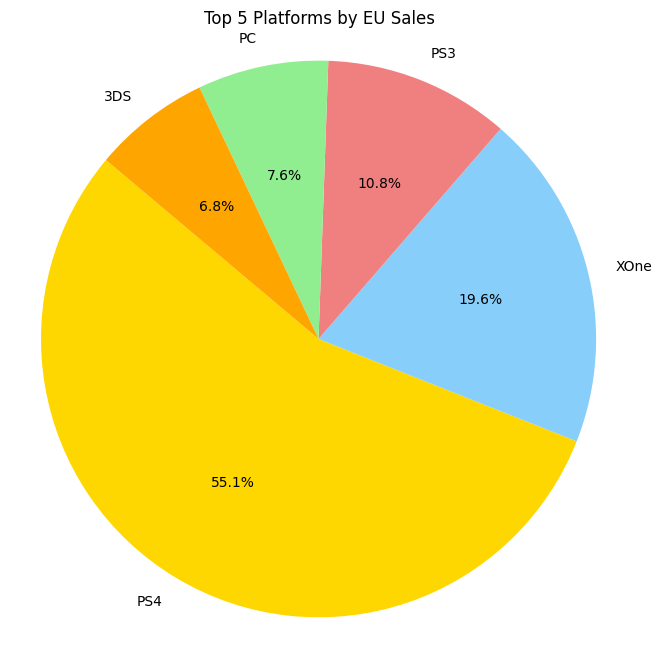

In [35]:
platforms = top_5_platforms_eu.index
sales = top_5_platforms_eu.values
colors = ['gold', 'lightskyblue', 'lightcoral', 'lightgreen', 'orange']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales, labels=platforms, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Platforms by EU Sales')
plt.axis('equal')  
plt.show()

In [36]:
# Group by genre and sum eu_sales
genre_eu_sales = games.groupby('genre')['eu_sales'].sum()

# Sort 
top_5_genres_eu = genre_eu_sales.sort_values(ascending=False).head(5)

print("Top 5 Genres by EU Sales:")
display(top_5_genres_eu)

Top 5 Genres by EU Sales:


genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

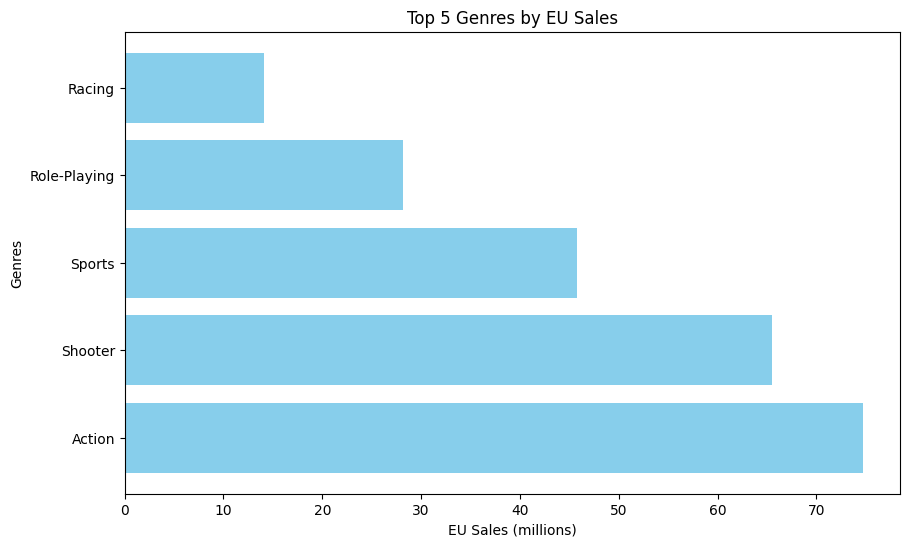

In [37]:
genres = top_5_genres_eu.index
sales = top_5_genres_eu.values

plt.figure(figsize=(10, 6))
plt.barh(genres, sales, color='skyblue')
plt.xlabel('EU Sales (millions)')
plt.ylabel('Genres')
plt.title('Top 5 Genres by EU Sales')

plt.show()

In [38]:
# Group by rating and sum eu_sales
rating_eu_sales = games.groupby('rating')['eu_sales'].sum()

# Sort 
top_ratings_eu = rating_eu_sales.sort_values(ascending=False).head()

print("Top Ratings by EU Sales:")
display(top_ratings_eu)

Top Ratings by EU Sales:


rating
M       93.44
E       58.06
T       34.07
E10+    26.16
Name: eu_sales, dtype: float64

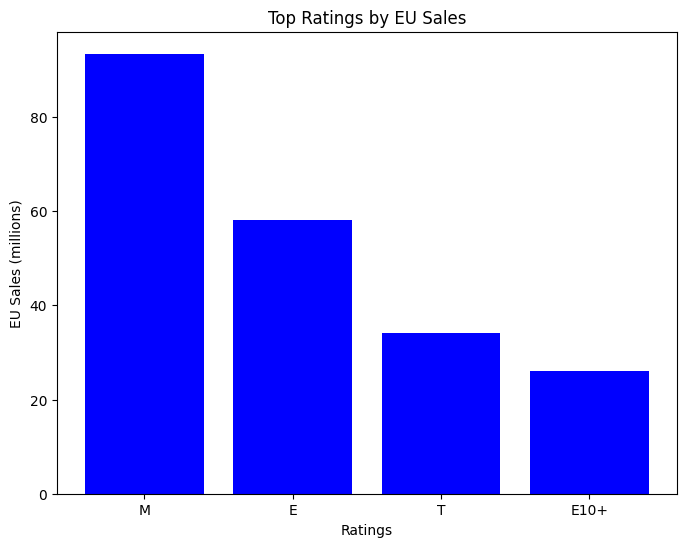

In [39]:
ratings = top_ratings_eu.index
sales = top_ratings_eu.values

plt.figure(figsize=(8, 6))
plt.bar(ratings, sales, color='blue')
plt.xlabel('Ratings')
plt.ylabel('EU Sales (millions)')
plt.title('Top Ratings by EU Sales')

plt.show()

## JP sales data

In [40]:
# Group by platform and sum jp_sales
platform_jp_sales = games.groupby('platform')['jp_sales'].sum()

# Sort 
top_5_platforms_jp = platform_jp_sales.sort_values(ascending=False).head(5)

print("Top 5 Platforms by JP Sales:")
display(top_5_platforms_jp)

Top 5 Platforms by JP Sales:


platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

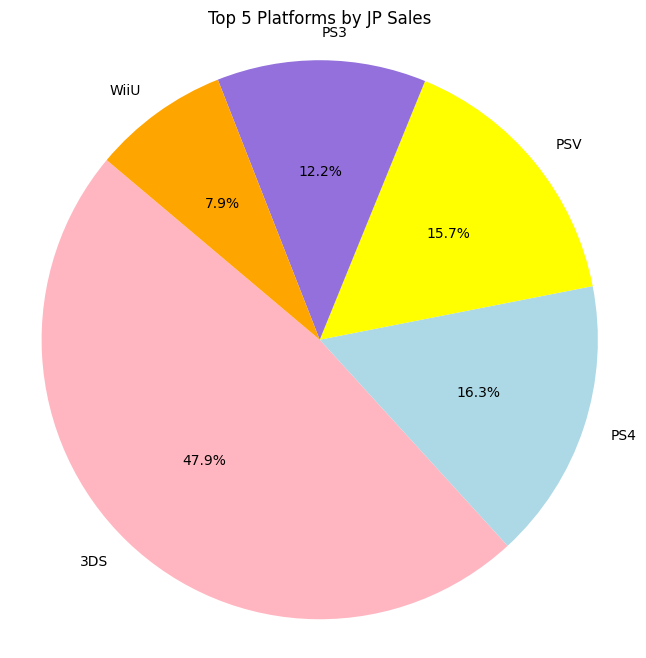

In [41]:
platforms = top_5_platforms_jp.index
sales = top_5_platforms_jp.values

# Create a pie chart
colors = ['lightpink', 'lightblue', 'yellow', 'mediumpurple', 'orange']
plt.figure(figsize=(8, 8))
plt.pie(sales, labels=platforms, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Platforms by JP Sales')
plt.axis('equal') 
plt.show()

In [42]:
# Group by genre and sum jp_sales
genre_jp_sales = games.groupby('genre')['jp_sales'].sum()

# Sort 
top_5_genres_jp = genre_jp_sales.sort_values(ascending=False).head(5)

print("Top 5 Genres by JP Sales:")
display(top_5_genres_jp)

Top 5 Genres by JP Sales:


genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

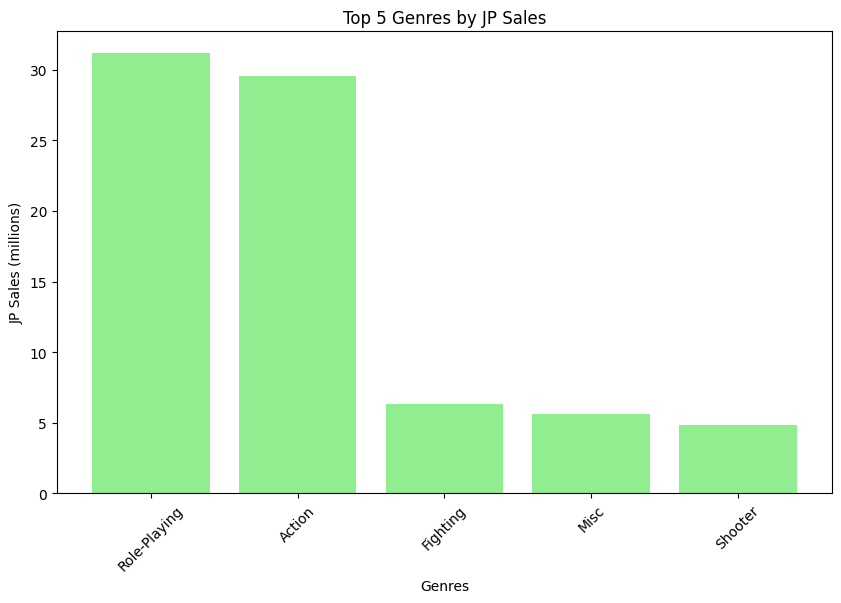

In [43]:
genres = top_5_genres_jp.index
sales = top_5_genres_jp.values

plt.figure(figsize=(10, 6))
plt.bar(genres, sales, color='lightgreen')
plt.xlabel('Genres')
plt.ylabel('JP Sales (millions)')
plt.title('Top 5 Genres by JP Sales')
plt.xticks(rotation=45)

plt.show()

In [44]:
# Group by rating and sum jp_sales
rating_jp_sales = games.groupby('rating')['jp_sales'].sum()

# Sort
top_ratings_jp = rating_jp_sales.sort_values(ascending=False).head()

print("Top Ratings by JP Sales:")
display(top_ratings_jp)

Top Ratings by JP Sales:


rating
T       14.78
E        8.94
M        8.01
E10+     4.46
Name: jp_sales, dtype: float64

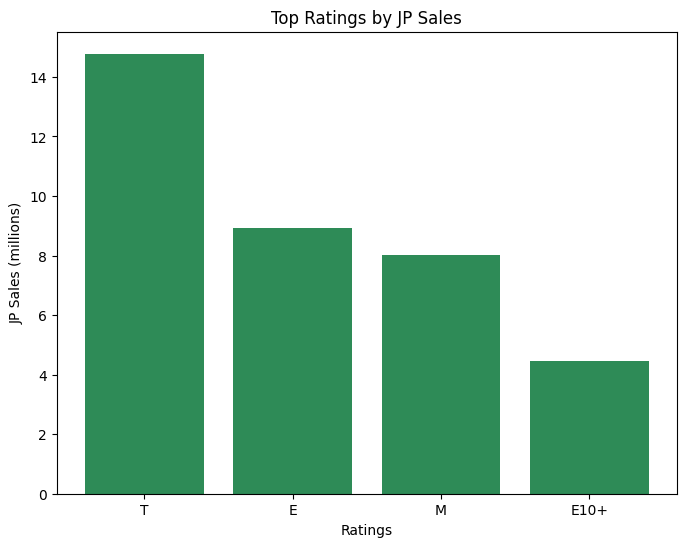

In [45]:
ratings = top_ratings_jp.index
sales = top_ratings_jp.values

plt.figure(figsize=(8, 6))
plt.bar(ratings, sales, color='seagreen')
plt.xlabel('Ratings')
plt.ylabel('JP Sales (millions)')
plt.title('Top Ratings by JP Sales')

plt.show()

- In the NA region, the top selling platform is the PS4. For the EU region it is the same; however, the EU region sells more than the NA region does. The JP region's top selling platform is the 3DS and it sells much less than the two other regions.
- The top genre for both the NA and EU regions are shooter. The top genre for the JP region is action. 
- My hypothesis is that ESRB ratings are definitely affected by idividual sales. 
- Visuals for all sections have been included. 

# Testing the hypothesis

In [46]:
# Average user ratings of the Xbox One and PC platforms are the same

# Filter data for Xbox One and PC platforms
xbox_one_scores = games[games['platform'] == 'XOne']['user_score'].dropna().astype(float)
pc_scores = games[games['platform'] == 'PC']['user_score'].dropna().astype(float)

# Perform two-sample t-test
t_statistic, p_value = st.ttest_ind(xbox_one_scores, pc_scores, equal_var=True)

# Interpret results
alpha = 0.05  # significance level
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject null hypothesis: Average user ratings of Xbox One and PC platforms are not the same.")
else:
    print("Fail to reject null hypothesis: Average user ratings of Xbox One and PC platforms are the same.")

T-statistic: 1.6285882029651313
P-value: 0.10450507919348415
Fail to reject null hypothesis: Average user ratings of Xbox One and PC platforms are the same.


In [47]:
# Average user ratings for the Action and Sports genres are different

# Filter data for Action and Sports genres
action_scores = games[games['genre'] == 'Action']['user_score'].dropna().astype(float)
sports_scores = games[games['genre'] == 'Sports']['user_score'].dropna().astype(float)

# Perform two-sample t-test
t_statistic, p_value = st.ttest_ind(action_scores, sports_scores, equal_var=True)

# Interpret results
alpha = 0.05  # significance level
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject null hypothesis: Average user ratings for Action and Sports genres are different.")
else:
    print("Fail to reject null hypothesis: Average user ratings for Action and Sports genres are the same.")


T-statistic: 9.425173048948047
P-value: 2.8711147985105864e-19
Reject null hypothesis: Average user ratings for Action and Sports genres are different.


# Overall Conclusion
North America sells the most games with Europe coming in second. Japan comes in third, but overall they do not sell that much when you look at the numbers. Shooter, action, and sports are the top three genres for both North America and Europe; however, the order is a bit different. Japan's top genre's are completely different with action, role- playing, and adventure. 